# Life Expectancy in the United States (2000–2021)

**Author:** Abdullah Alshahrani  
**Course:** Data Wrangling  
**Instructor:** Nathaniel Blanchard  
**Date:** April 2025  

Understanding how life expectancy changes over time is a key indicator of a nation’s health, quality of life, and public policy outcomes. In this project, I analyze life expectancy at birth in the United States from 2000 to 2021 using data provided by the World Health Organization (WHO).

The goal of this analysis is to:
- Explore overall life expectancy trends in the U.S. over the last two decades.
- Investigate the differences in life expectancy between males and females.
- Compare the U.S. life expectancy with regional (Americas) averages.
- Identify significant events that may have influenced longevity trends, such as the COVID-19 pandemic.

By combining visual analysis with demographic data, this project aims to uncover how population health has evolved and what disparities exist by gender or region. These insights can be valuable in understanding the impact of public health systems, social conditions, and crises on national life expectancy.



## About the Data

The dataset used in this project comes from the [World Health Organization (WHO)](https://data.who.int/countries/840) and contains life expectancy values for various countries and years. For this project, only data from the United States was analyzed, specifically life expectancy at birth from 2000 to 2021, broken down by sex (male/female) and compared against regional data (Americas).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme()


In [3]:
from google.colab import files
uploaded = files.upload()


Saving 90E2E48_ALL_LATEST.csv to 90E2E48_ALL_LATEST (1).csv


In [25]:
df = pd.read_csv('90E2E48_ALL_LATEST.csv')
df.head()


,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,AMOUNT_N
0,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2021,YEAR,4,COUNTRY,PUBLISHED,Life expectancy (at birth),Afghanistan,FEMALE,60.986038
1,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2021,YEAR,953,WHOREGION,PUBLISHED,Life expectancy (at birth),Africa,FEMALE,65.371376
2,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2021,YEAR,8,COUNTRY,PUBLISHED,Life expectancy (at birth),Albania,FEMALE,78.612389
3,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2021,YEAR,12,COUNTRY,PUBLISHED,Life expectancy (at birth),Algeria,FEMALE,76.638748
4,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2021,YEAR,24,COUNTRY,PUBLISHED,Life expectancy (at birth),Angola,FEMALE,64.255836


In [30]:
region_life_exp = df[
    (df['GEO_NAME_SHORT'].isin(['United States of America', 'Americas'])) &
    (df['IND_NAME'].str.contains('Life expectancy')) &
    (df['DIM_SEX'] == 'TOTAL')
]


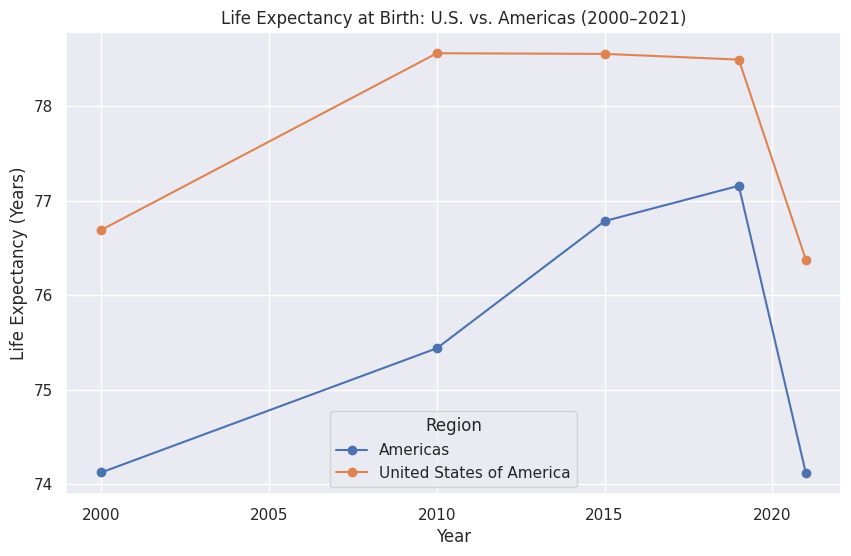

In [27]:
region_pivot = region_life_exp.pivot(index='DIM_TIME', columns='GEO_NAME_SHORT', values='AMOUNT_N')

region_pivot.plot(marker='o', figsize=(10, 6))
plt.title('Life Expectancy at Birth: U.S. vs. Americas (2000–2021)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


Observations:

The life expectancy in the United States increased gradually between 2000 and 2019, reaching a peak just before 2020.

 There is a noticeable decline in 2020–2021, most likely as a result of the COVID-19 pandemic.

 The U.S. had a continuously longer life expectancy than the rest of the Americas, but within the past two years, the difference has dramatically decreased.

 One significant demographic trend is still the gender gap—females living longer than males—that was noted in the previous plot.

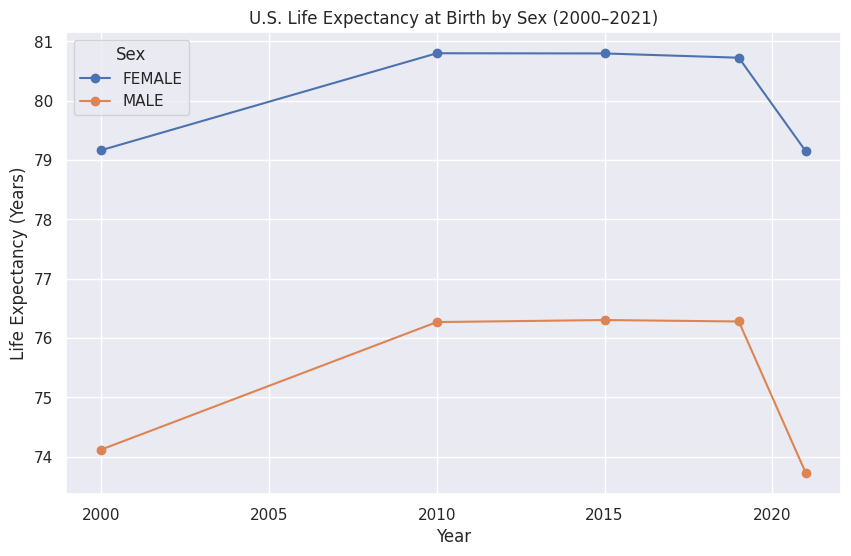

In [29]:
us_by_sex = df[
    (df['GEO_NAME_SHORT'] == 'United States of America') &
    (df['IND_NAME'].str.contains('Life expectancy')) &
    (df['DIM_SEX'].isin(['MALE', 'FEMALE']))
]

pivot_sex = us_by_sex.pivot(index='DIM_TIME', columns='DIM_SEX', values='AMOUNT_N')


pivot_sex.plot(marker='o', figsize=(10, 6))
plt.title('U.S. Life Expectancy at Birth by Sex (2000–2021)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()


🧠 Analysis:

 US Life Expectancy by Geography (2000–2021)
 Over the previous 20 years, the figure demonstrates a distinct and steady disparity in life expectancy between males and girls in the US:

 Throughout the years 2000–2021, women have continuously outlived men by on average 5–6 years.

 Men and women have long-standing differences in health and demographics, as evidenced by this gender gap, which is evident each year.

 Between 2000 and about 2014–2015, the life expectancy of both men and women progressively increased.

 As a result of the COVID-19 pandemic, both trends exhibit a steep fall in 2020 and 2021.

 For men, the drop seems more noticeable, maybe as a result of increased susceptibility or exposure during the epidemic.

📌 **Conclusion**

This project explored U.S. life expectancy trends from 2000 to 2021 using WHO data, focusing on both gender-based differences and international comparisons.

Key findings:
- Life expectancy in the U.S. showed a steady increase from 2000 to around 2014–2015, indicating gradual improvements in health outcomes.
- A significant decline occurred in 2020 and 2021, likely due to the COVID-19 pandemic, with females experiencing a slightly sharper drop.
- Throughout the entire period, females consistently lived longer than males by approximately 5–6 years, reflecting long-standing health disparities.
- When compared to the Americas region, the U.S. maintained a higher life expectancy, although the gap narrowed significantly after 2019.

These findings highlight the importance of gender-sensitive and crisis-responsive healthcare policy. Visualizing and analyzing public health data like this helps us track progress and challenges in population wellbeing, offering valuable insights for future planning and health system improvements.

